In [2]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from astropy.table import Table
%matplotlib inline

Read ERy coarse table

In [3]:
m = Table.read('y3a2_coarse_auto_v1.fits')

In [4]:
m

HPIX,LIMMAG [5],EXPTIME [5],LIMMAG_ERR [5],EXPTIME_ERR [5],NGAL [5],NPIX_FIT [5]
int64,float32,float32,float32,float32,int32,int32
5699640,21.9683 .. 19.1119,0.0612805 .. 0.00563985,0.0237853 .. 0.0593977,0.00202445 .. 0.00194495,228 .. 845,9 .. 25
5699641,21.9682 .. 19.1576,0.0612728 .. 0.00692767,0.022648 .. 0.0908732,0.00148678 .. 0.00254362,212 .. 720,9 .. 25
5699642,22.0975 .. 19.1143,0.080896 .. 0.00581016,0.0709604 .. 0.0705662,0.0147301 .. 0.00111806,252 .. 800,9 .. 25
5699643,22.194 .. 19.1591,0.130881 .. 0.00478835,0.0497154 .. 0.110532,0.0270158 .. 0.000776303,282 .. 960,9 .. 25
5699644,22.4351 .. 19.2687,0.0941978 .. 0.00510837,0.0 .. 0.05932,6.45165e-06 .. 0.000386367,418 .. 1171,9 .. 25
5699645,22.5789 .. 19.6695,0.10754 .. 0.00939768,0.0161037 .. 0.0548271,0.00345002 .. 0.000945067,462 .. 1457,9 .. 25
5699646,22.7415 .. 19.6173,0.125747 .. 0.0095555,0.0370181 .. 0.275261,0.00578897 .. 0.00722156,471 .. 471,9 .. 9
5699647,22.7928 .. 19.8045,0.145594 .. 0.0161883,0.0874639 .. 0.0196923,0.0279069 .. 0.00284561,516 .. 516,9 .. 9
5699648,22.5929 .. 19.7233,0.108932 .. 0.0115962,0.025372 .. 0.0281171,0.00256455 .. 0.00128248,495 .. 1424,9 .. 25


In [5]:
print m.colnames
len(m)
print m.meta

['HPIX', 'LIMMAG', 'EXPTIME', 'LIMMAG_ERR', 'EXPTIME_ERR', 'NGAL', 'NPIX_FIT']
OrderedDict()


In [14]:
ra, dec = hp.pix2ang(1024, np.arange(hp.nside2npix(1024)), lonlat=True)
print ra, dec

[  45.  135.  225. ...,  135.  225.  315.] [ 89.95431464  89.95431464  89.95431464 ..., -89.95431464 -89.95431464
 -89.95431464]


Getting g mag lim and turning into a full map

In [7]:
g = np.zeros(hp.nside2npix(1024))+hp.UNSEEN
g[m['HPIX']] = m['LIMMAG'][0]

/home/ogando/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.
  from ipykernel import kernelapp as app


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


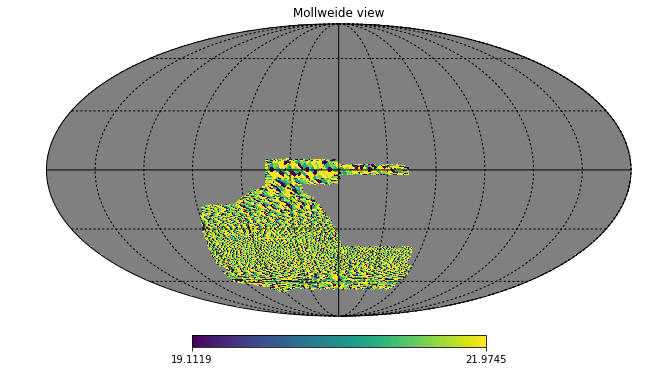

In [10]:
hp.mollview(g)
hp.graticule()

Reading my coarse map, which is a subregion of Y3A1

In [20]:
riom = Table.read('join_maglimfit_1_._10sigma_AUTO_coarsedepthmap.fits')

In [21]:
riom

HPIX,LIMMAG [6],EXPTIME [6],LIMMAG_ERR [6],EXPTIME_ERR [6],NGAL,NPIX_FIT [6]
int32,float32,float32,float32,float32,int32,int16
4535296,23.1476 .. 21.16,216.431 .. 32.44,0.025 .. 0.025,21.6431 .. 3.244,8,1 .. 1
4535297,22.8408 .. 21.1461,170.328 .. 38.8966,0.025 .. 0.025,17.0328 .. 3.88966,11,1 .. 1
4535298,22.7256 .. 20.8106,132.493 .. 21.9454,0.025 .. 0.025,13.2493 .. 2.19454,8,1 .. 1
4535299,22.6191 .. 21.1731,123.025 .. 32.9739,0.025 .. 0.025,12.3025 .. 3.29739,8,1 .. 1
4535300,22.2301 .. 20.6694,81.6458 .. 18.7658,0.025 .. 0.025,8.16458 .. 1.87658,2,1 .. 1
4535301,22.9839 .. 21.0048,238.179 .. 28.8146,0.025 .. 0.025,23.8179 .. 2.88146,4,1 .. 1
4535302,22.7792 .. 21.0044,149.555 .. 26.6603,0.025 .. 0.025,14.9555 .. 2.66603,11,1 .. 1
4535303,22.54 .. 20.9245,109.304 .. 24.6658,0.025 .. 0.025,10.9304 .. 2.46658,8,1 .. 1
4535304,22.6292 .. 21.1955,129.858 .. 35.098,0.025 .. 0.025,12.9858 .. 3.5098,9,1 .. 1


Getting g mag lim 

In [22]:
riog = np.zeros(hp.nside2npix(1024))+hp.UNSEEN
riog[riom['HPIX']] = riom['LIMMAG'][0]

/home/ogando/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.
  from ipykernel import kernelapp as app


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


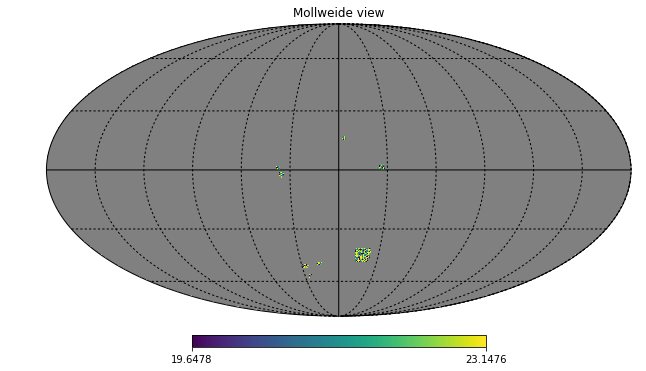

In [24]:
hp.mollview(riog, nest=True)
hp.graticule()

Getting g mag lim (turning from NEST to RING) and checking that this works

In [26]:
riog = np.zeros(hp.nside2npix(1024))+hp.UNSEEN
riog[hp.nest2ring(1024, riom['HPIX'])] = riom['LIMMAG'][0]

/home/ogando/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: assignment will raise an error in the future, most likely because your index result shape does not match the value array shape. You can use `arr.flat[index] = values` to keep the old behaviour.
  from ipykernel import kernelapp as app


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


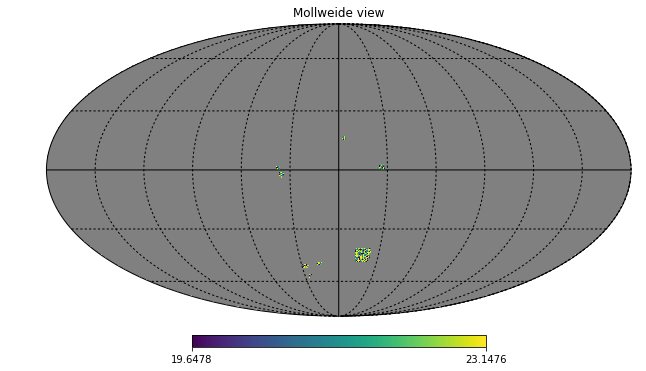

In [27]:
hp.mollview(riog)
hp.graticule()

Getting pixels in common

In [30]:
ryhpix = np.zeros(hp.nside2npix(1024))
ryhpix[m['HPIX']] = 1
riohpix = np.zeros(hp.nside2npix(1024))
riohpix[hp.nest2ring(1024, riom['HPIX'])] = 1

In [31]:
mask = (ryhpix == 1)*(riohpix == 1)

Plotting mag lim against mag lim. What the heck?

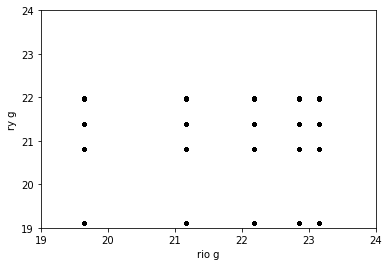

In [53]:
plt.plot(riog[mask], g[mask], 'k.', alpha=0.1)
plt.xlim(19, 24)
plt.ylim(19, 24)
plt.xlabel('rio g')
plt.ylabel('ry g')

In [37]:
print np.sum(mask)
print np.sum(ryhpix)
print np.sum(riohpix)

30254
1592632.0
31423.0


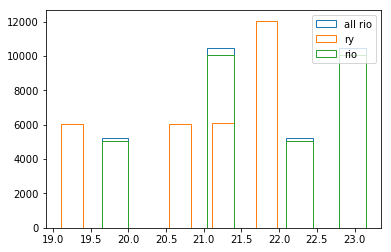

In [49]:
#plt.hist(g[g>0], histtype='step', label='all ry')
plt.hist(riog[riog>0], histtype='step', label='all rio')
plt.hist(g[mask], histtype='step', label='ry')
plt.hist(riog[mask], histtype='step', label='rio')
plt.legend()

In [48]:
g[g>0]

array([ 19.11190224,  21.96827698,  21.97453117, ...,  21.96827698,
        21.97453117,  21.38928986])